In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle

mpl.rcParams.update({'font.size': 14, 'axes.labelsize': 'medium', 'axes.titlesize': 'medium', 'legend.fontsize': 12})

In [9]:
def fold_analysis(run_name):
    dfs_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/summary_results.csv')
    print('RECOVERY', dfs_fold.recovery.mean(), dfs_fold.dtermen_recovery.mean())
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold, x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold.recovery.max()+1])
    ax.set_ylim([0, dfs_fold.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel(f'Percent Recovery from TERMinator {run_name}')
    ax.set_title(f'Ingraham split')
        
    fig, ax = plt.subplots(figsize=(6,4.5))
    with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/training_curves.pk', 'rb') as f:
        training_curve = pickle.load(f)
    train, test = zip(*training_curve)
    ax.plot(np.arange(len(train)), train)
    ax.plot(np.arange(len(test)), test)
    ax.set_ylim([min(min(train), min(test)), max(max(train), max(test))])
    ax.set_title(f'Ingraham split')

In [10]:
def perplexity(run_name):
    with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_ingraham_{run_name}/perplexity.log') as fp:
        fp.readline()
        p = float(fp.readline().strip())
        print(f"Perplexity {p}")

# Full Model

RECOVERY 39.199810285714285 23.89610711607143


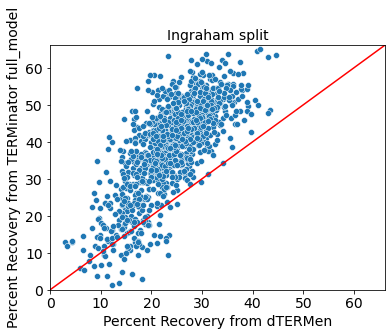

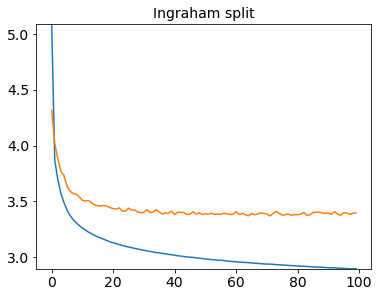

In [11]:
fold_analysis("full_model")

In [12]:
perplexity("full_model")

Perplexity 5.2627339363098145


# Ablate net1

RECOVERY 38.03982468571429 23.89610711607143


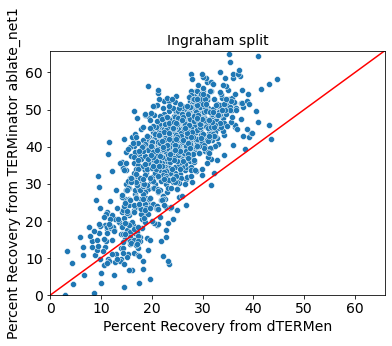

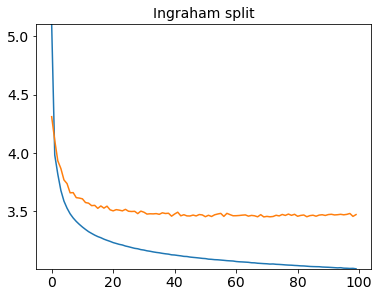

In [21]:
fold_analysis("ablate_net1")

In [22]:
perplexity("ablate_net1")

Perplexity 5.431153297424316


# Delete net1

RECOVERY 37.77712311607143 23.89610711607143


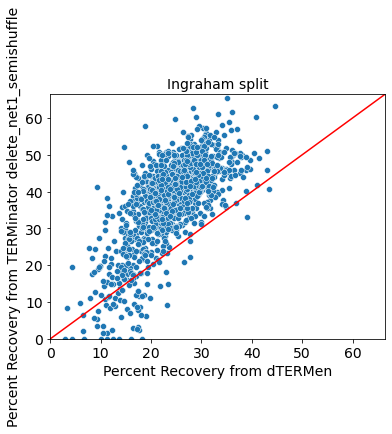

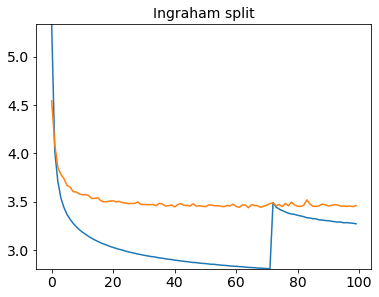

In [19]:
fold_analysis("delete_net1_semishuffle")

In [20]:
perplexity("delete_net1_semishuffle")

Perplexity 5.4165120124816895


# Ablate coords

RECOVERY 34.27613304285715 23.89610711607143


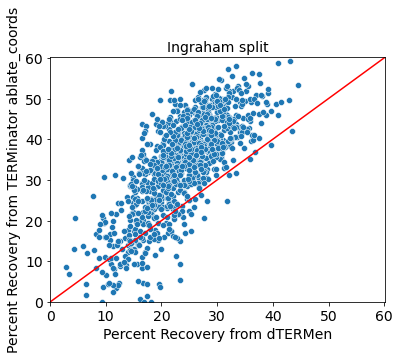

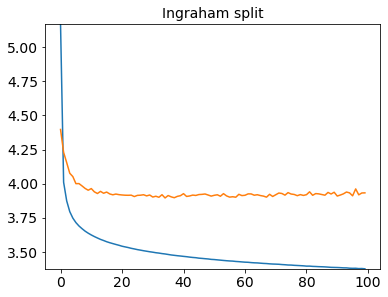

In [15]:
fold_analysis("ablate_coords")

In [16]:
perplexity("ablate_coords")

Perplexity 6.853372573852539


# Ablate s2s

RECOVERY 24.246016668750002 23.89610711607143


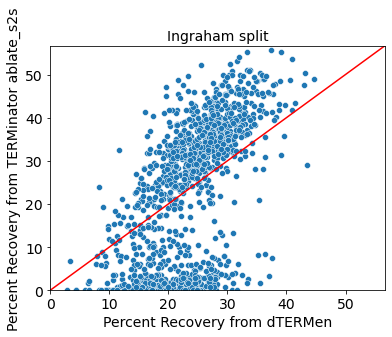

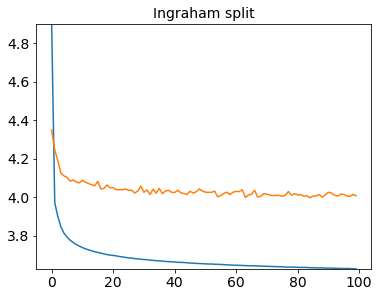

In [17]:
fold_analysis("ablate_s2s")

In [18]:
perplexity("ablate_s2s")

Perplexity 7.196211814880371
